磁场扰动规律探索

# dmsp

In [1]:
import matplotlib.pyplot as plt

from pyaw.dmsp import SPDF

In [2]:
spdf = SPDF()

In [3]:
fp_s3 = 'D:\cleo\master\pyaw\data\DMSP\ssies3\dmsp-f18_ssies-3_thermal-plasma_201401010124_v01.cdf'  # 一轨
fns = ['dmsp-f18_ssies-3_thermal-plasma_201401010124_v01.cdf',
       'dmsp-f18_ssies-3_thermal-plasma_201401010306_v01.cdf',
       'dmsp-f18_ssies-3_thermal-plasma_201401030059_v01.cdf',
       'dmsp-f18_ssies-3_thermal-plasma_201401031941_v01.cdf',
       'dmsp-f18_ssies-3_thermal-plasma_201401032123_v01.cdf',
       ]
# 'dmsp-f18_ssies-3_thermal-plasma_201401010448_v01.cdf',  # 地磁亚暴期间
# 'dmsp-f18_ssies-3_thermal-plasma_201401010630_v01.cdf'
# 'dmsp-f18_ssies-3_thermal-plasma_201401010812_v01.cdf'
# fps_s3 = ["D:/cleo/master/pyaw/data/DMSP/ssies3/" + i for i in fns]
fps_s3 = ["//Diskstation1/file_three/aw/DMSP/spdf/f18/ssies3/2014/" + i for i in fns]

In [4]:
fp_ssm = 'D:\cleo\master\pyaw\data\DMSP\ssm\dmsp-f18_ssm_magnetometer_20140101_v1.0.4.cdf'  # 1天 天数统一

IndexError: index 0 is out of bounds for axis 0 with size 0

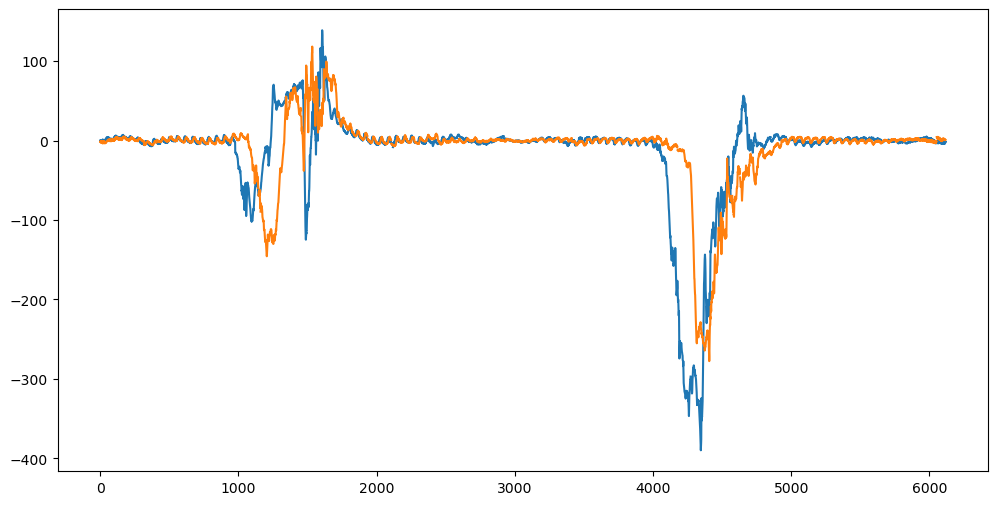

In [5]:
plt.figure(figsize=(12,6))
orbit_numbers = []
for fp_s3 in fps_s3:
    s3_df = spdf.r_s3(fp_s3)
    s3_df_pre = spdf.s3_pre(s3_df)
    ssm_df = spdf.r_ssm(fp_ssm)
    ssm_df_pre = spdf.ssm_pre(ssm_df)
    clipped_ssm_df = spdf.clip_ssm_by_ssies3(s3_df_pre, ssm_df_pre)
    s3_ssm_df = spdf.get_s3_ssm(s3_df_pre, clipped_ssm_df)

    plt.plot(range(s3_ssm_df.shape[0]),s3_ssm_df['b1_s3_sc1'].values)
    # s3_ssm_df['b1_s3_sc1'].plot()
plt.show()